# Logistic Regression Classifier / CSC 578D / Fall 2018

### Notes:
1. Dataset can be found __[here](http://www.apkc.net/data)__.
1. See notes by hand __[here](http://www.apkc.net/_10)__.

**Author:** Andreas P. Koenzen <akoenzen@uvic.ca>
<br>
**Version:** 0.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Bankruptcy example: (Same as Perceptron algorithm)
- L = is the number of late payments on credit cards over the past year.
- R = is the ratio of earnings to expenses (earnings : expenses).
- Bankrupt = **-1 is NO / 1 is YES**.

In [2]:
data = pd.read_csv("http://www.apkc.net/data/csc_578d/perceptron_1.csv")
data

,L,R,Bankupt
0,3,0.2,-1
1,1,0.3,-1
2,4,0.5,-1
3,2,0.7,-1
4,0,1.0,-1
5,1,1.2,-1
6,1,1.7,-1
7,6,0.2,1
8,7,0.3,1
9,6,0.7,1


### Plot the data:

[Text(0,0.5,'L'), Text(0.5,0,'R')]

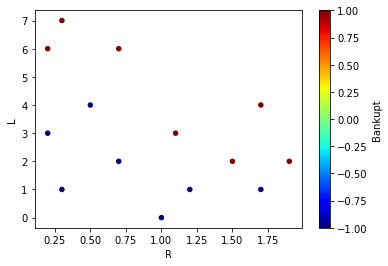

In [3]:
fig, ax = plt.subplots()
data.plot.scatter(x=1, y=0, c=2, colormap='jet', ax=ax)
ax.set(xlabel='R', ylabel='L')
plt.show()

### Compute the weights of the line:

Do N iterations and test the classifier.

In [4]:
iterations = 10000
kappa = 0.1

# initialize vector w to all 1.0
w = np.array([[1.0, 1.0, 1.0]])

for k in range(iterations):
    # create vector x: should be feature #2, feature #1, y-intercept or feature #0
    # 1. add the feature #0 to the X vector
    w0 = np.ones((len(data.index), 1), dtype=float)
    x = np.hstack([data.values[:,:2], w0])
        
    # 2. create the y vector
    y = np.array(data.values[:, 2:])

    # debug: compute aproximations
    p = 1 / (1 + np.exp(-y * (x @ w.T)))
    # p
    
    # debug: compute errors
    error = np.log(1 + np.exp(-y * (x @ w.T)))
    # error
    error_sum = (1 / len(x)) * np.sum(np.log(1 + np.exp(-y * (x @ w.T))), axis=0, keepdims=True)
    if k + 1 == iterations:
        error_sum
            
    # 5. update weights
    z = (-1 / len(x)) * np.sum((y * x) / (1 + np.exp(y * (x @ w.T))), axis=0, keepdims=True)
    w = w - (kappa * z)
    
w

array([[0.13273657]])

array([[  2.56958871,   6.34767144, -13.89469194]])

### Plot the line:

[Text(0,0.5,'L'), Text(0.5,0,'R')]

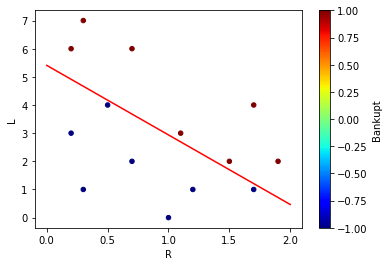

In [5]:
fig, ax = plt.subplots()

# draw the scatter plot
data.plot.scatter(x=1, y=0, c=2, colormap='jet', ax=ax)
ax.set(xlabel='R', ylabel='L')

# draw the line
w2 = np.asscalar(w[0][0])
w1 = np.asscalar(w[0][1])
w0 = np.asscalar(w[0][2])

plt.plot(
    np.linspace(0.0, 2.0, num=10),
    [((-(w1 * k) - (w0)) / w2) for k in np.linspace(0.0, 2.0, num=10)],
    c= "red"
)

plt.show()